In [1]:
import pandas as pd
import numpy as np

In [2]:
#df = pd.read_csv("")
dfs = pd.read_excel("Data.xlsx", sheet_name=None)
dfs.keys()
plants = dfs['plants']
flight_dates =dfs['flight dates']
weather = dfs['weather']
planting = dfs['planting']

In [3]:
#rename the weather data which column is Unnamed: 0
weather= weather.rename(columns={'Unnamed: 0':'Plant Date'})

In [4]:
# Add flight dates from 2020 plant data.
df = plants.merge(flight_dates, how='left', on='Batch Number')
df = df.drop(['Flight Date_x'], axis=1)
#check missing data
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4859 non-null   int64         
 1   Plant Date            4685 non-null   datetime64[ns]
 2   Class                 4859 non-null   int64         
 3   Fresh Weight (g)      4858 non-null   float64       
 4   Head Weight (g)       4754 non-null   float64       
 5   Radial Diameter (mm)  4754 non-null   float64       
 6   Polar Diameter (mm)   4754 non-null   float64       
 7   Diameter Ratio        4752 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4672 non-null   float64       
 10  Leaf Area (cm^2)      4857 non-null   float64       
 11  Square ID             4859 non-null   int64         
 12  Check Date            4859 non-null   datetime64[ns]
 13  Remove            

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Remove,Flight Date_y
0,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,2020-04-30,NaN,2020-04-30
1,402,2020-04-11,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,2020-04-30,NaN,2020-04-30
2,402,2020-04-11,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,2020-04-30,NaN,2020-04-30
3,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,2020-04-30,NaN,2020-04-30
4,402,2020-04-11,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,2020-04-30,NaN,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4854,738,2020-08-27,4,284.0,12.0,50.0,55.0,0.909091,NaN,NaN,430.0,1172,2020-10-20,NaN,NaT
4855,738,2020-08-27,5,199.0,8.0,45.0,85.0,0.529412,NaN,NaN,358.0,1172,2020-10-20,NaN,NaT
4856,738,2020-08-27,3,280.0,23.0,60.0,80.0,0.750000,NaN,NaN,417.0,1172,2020-10-20,NaN,NaT
4857,738,2020-08-27,4,247.0,10.0,45.0,80.0,0.562500,NaN,NaN,413.0,1172,2020-10-20,NaN,NaT


In [5]:
#check how many 'r' is in the Remove
df['Remove'].value_counts()
#find the r
indexNames = df[ df['Remove'] == 'r' ].index
#drop the row which Remove = r
df.drop(indexNames , inplace=True)

In [6]:
# we dont need remove anymore
#drop remove
df = df.drop(['Remove'], axis=1)

In [7]:
#drop plant date which is null
df = df.dropna(axis='index', how='all', subset=['Plant Date'])

In [8]:
# create days to check
df['days_to _check'] = pd.to_datetime(df['Flight Date_y'])-pd.to_datetime(df['Plant Date'])
df = df.drop(['Flight Date_y'], axis=1)

In [9]:
#days to check column trandfer to int
a = df[:4615]['days_to _check'] / np.timedelta64(1, 'D')
type(a)

pandas.core.series.Series

In [10]:
#transfer seris to dataframe
a=a.to_frame()
#rename days to check to check days
df = df.rename(columns={'days_to _check':'check_days'})
#merge two data
df = pd.concat([df,a],axis = 1)
#drop the check days which did not transfer to int
df = df.drop(['check_days'], axis = 1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4615 entries, 0 to 4858
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4615 non-null   int64         
 1   Plant Date            4615 non-null   datetime64[ns]
 2   Class                 4615 non-null   int64         
 3   Fresh Weight (g)      4614 non-null   float64       
 4   Head Weight (g)       4510 non-null   float64       
 5   Radial Diameter (mm)  4510 non-null   float64       
 6   Polar Diameter (mm)   4510 non-null   float64       
 7   Diameter Ratio        4508 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4428 non-null   float64       
 10  Leaf Area (cm^2)      4613 non-null   float64       
 11  Square ID             4615 non-null   int64         
 12  Check Date            4615 non-null   datetime64[ns]
 13  days_to _check    

In [67]:
df.isnull().sum()

Batch Number          0
Plant Date            0
Class                 0
fresh_weight          1
head_weight           5
radial_diameter       5
polar_diameter        5
Leaves                0
leaf_area             2
Square ID             0
Check Date            0
day_to_check       1321
dtype: int64

In [12]:
#column leave fill null data in zero
df['Leaves'] = df['Leaves'].fillna(0)

In [13]:
#fill in zero when leaves is not zero
df.loc[df.Leaves != 0 ,'Head Weight (g)'] = 0

In [16]:
df.loc[df.Leaves != 0 ,'Radial Diameter (mm)'] = 0

In [17]:
df.loc[df.Leaves != 0 ,'Polar Diameter (mm)'] = 0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4615 entries, 0 to 4858
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4615 non-null   int64         
 1   Plant Date            4615 non-null   datetime64[ns]
 2   Class                 4615 non-null   int64         
 3   Fresh Weight (g)      4614 non-null   float64       
 4   Head Weight (g)       4610 non-null   float64       
 5   Radial Diameter (mm)  4610 non-null   float64       
 6   Polar Diameter (mm)   4610 non-null   float64       
 7   Diameter Ratio        4508 non-null   float64       
 8   Leaves                4615 non-null   float64       
 9   Density (kg/L)        4428 non-null   float64       
 10  Leaf Area (cm^2)      4613 non-null   float64       
 11  Square ID             4615 non-null   int64         
 12  Check Date            4615 non-null   datetime64[ns]
 13  days_to _check    

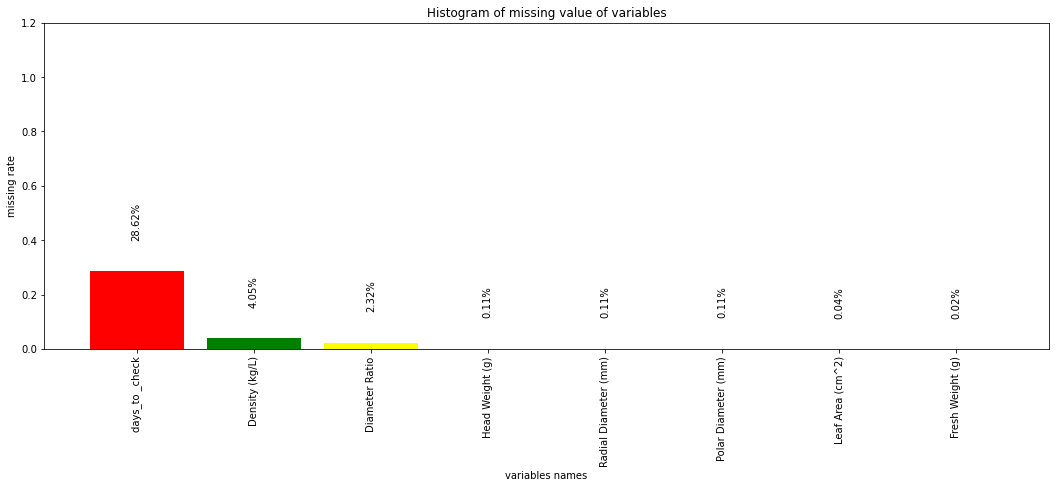

In [19]:
# cuculate the missing data
missing=df.isnull().sum().reset_index().rename(columns={0:'missNum'})
# cuculate the missing rate
missing['missRate']=missing['missNum']/df.shape[0]
# rank the missing rate
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
# miss_analy 

import matplotlib.pyplot as plt
import pylab as pl

fig = plt.figure(figsize=(18,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center'
    ,color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=90)    
plt.ylim([0,1.2])
    
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4615 entries, 0 to 4858
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4615 non-null   int64         
 1   Plant Date            4615 non-null   datetime64[ns]
 2   Class                 4615 non-null   int64         
 3   Fresh Weight (g)      4614 non-null   float64       
 4   Head Weight (g)       4610 non-null   float64       
 5   Radial Diameter (mm)  4610 non-null   float64       
 6   Polar Diameter (mm)   4610 non-null   float64       
 7   Diameter Ratio        4508 non-null   float64       
 8   Leaves                4615 non-null   float64       
 9   Density (kg/L)        4428 non-null   float64       
 10  Leaf Area (cm^2)      4613 non-null   float64       
 11  Square ID             4615 non-null   int64         
 12  Check Date            4615 non-null   datetime64[ns]
 13  days_to _check    

In [21]:
#drop leak data
df= df.drop(['Diameter Ratio'], axis = 1)
df= df.drop(['Density (kg/L)'], axis = 1)

In [22]:
#rename some of colunms
df = df.rename(columns={'Head Weight (g)':'head_weight', 'Radial Diameter (mm)':'radial_diameter','Polar Diameter (mm)':'polar_diameter','Fresh Weight (g)':'fresh_weight','Leaf Area (cm^2)':'leaf_area','days_to _check':'day_to_check'})

In [70]:
df.head(50)

,Batch Number,Plant Date,Class,fresh_weight,head_weight,radial_diameter,polar_diameter,Leaves,leaf_area,Square ID,Check Date,day_to_check
0,402,2020-04-11,3,15.0,0.0,0.0,0.0,10.0,185.0,208,2020-04-30,19.0
1,402,2020-04-11,4,15.0,0.0,0.0,0.0,11.0,156.0,208,2020-04-30,19.0
2,402,2020-04-11,1,16.0,0.0,0.0,0.0,12.0,137.0,208,2020-04-30,19.0
3,402,2020-04-11,3,15.0,0.0,0.0,0.0,10.0,225.0,208,2020-04-30,19.0
4,402,2020-04-11,3,15.0,0.0,0.0,0.0,11.0,157.0,208,2020-04-30,19.0
5,402,2020-04-11,2,14.0,0.0,0.0,0.0,10.0,206.0,208,2020-04-30,19.0
6,402,2020-04-11,2,21.0,0.0,0.0,0.0,11.0,236.0,208,2020-04-30,19.0
7,402,2020-04-11,3,14.0,0.0,0.0,0.0,11.0,159.0,208,2020-04-30,19.0
8,402,2020-04-11,2,13.0,0.0,0.0,0.0,11.0,205.0,208,2020-04-30,19.0
9,402,2020-04-11,1,16.0,0.0,0.0,0.0,11.0,165.0,208,2020-04-30,19.0


In [68]:
weather

,Plant Date,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,2014-05-14,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,2014-05-15,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,2014-05-16,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,2014-05-17,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,2014-05-18,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,2021-05-17,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,NaN
2552,2021-05-17,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,NaN
2553,2021-05-18,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.4
2554,2021-05-19,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.0


In [23]:
#merge weather data
data_all = df.merge(weather, how='left', on='Plant Date')

In [73]:
data_all.head(50)

,Batch Number,Plant Date,Class,fresh_weight,head_weight,radial_diameter,polar_diameter,Leaves,leaf_area,Check Date,day_to_check,Solar Radiation [avg],Battery Voltage [last],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Dew Point [avg],Dew Point [min],ET0 [result]
0,402,8.726400e+15,3,15.0,0.0,0.0,0.0,10.0,185.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
1,402,8.726400e+15,4,15.0,0.0,0.0,0.0,11.0,156.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
2,402,8.726400e+15,1,16.0,0.0,0.0,0.0,12.0,137.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
3,402,8.726400e+15,3,15.0,0.0,0.0,0.0,10.0,225.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
4,402,8.726400e+15,3,15.0,0.0,0.0,0.0,11.0,157.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
5,402,8.726400e+15,2,14.0,0.0,0.0,0.0,10.0,206.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
6,402,8.726400e+15,2,21.0,0.0,0.0,0.0,11.0,236.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
7,402,8.726400e+15,3,14.0,0.0,0.0,0.0,11.0,159.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
8,402,8.726400e+15,2,13.0,0.0,0.0,0.0,11.0,205.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
9,402,8.726400e+15,1,16.0,0.0,0.0,0.0,11.0,165.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7


In [26]:
data_all[data_all["head_weight"].isnull()]
data_all = data_all.dropna(axis='index', how='all', subset=['head_weight'])

In [28]:
# transfer datetime to float
# change them into the time passed since a specific reference time point
time0 = pd.Timestamp('2020-01-01')
data_all['Plant Date'] = (data_all['Plant Date'] - time0).values.astype(float)
data_all['Check Date'] = (data_all['Check Date'] - time0).values.astype(float)
#df['Flight Date_y'] = (df['Flight Date_y'] - time0).values.astype(float)

In [29]:
#find the cor
#select the important feature that relate to target(polar_diameter,radial_diameter,head_weight)
import seaborn as sns
import matplotlib.pyplot as plt

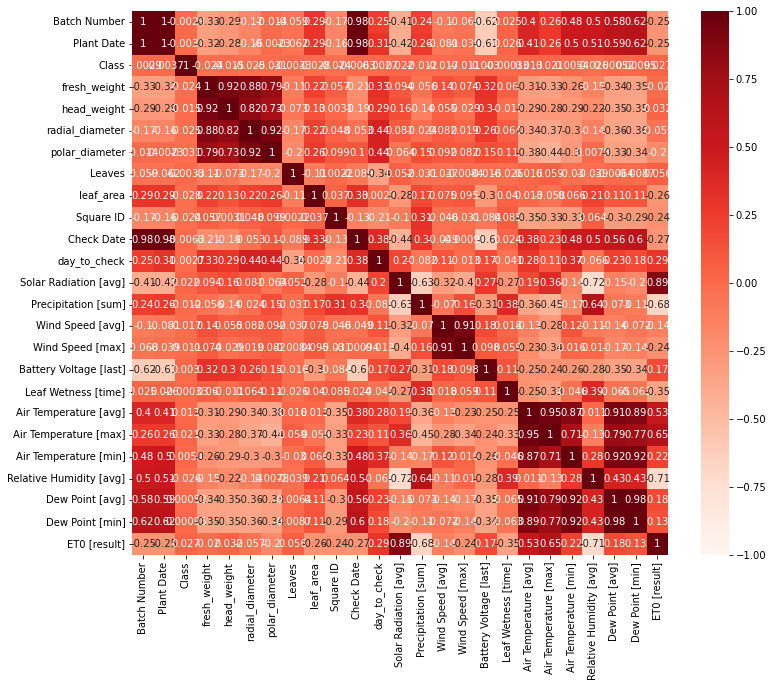

In [30]:
correlations = data_all.corr()
correlations['polar_diameter'].sort_values(ascending=False)
plt.figure(figsize=(12,10))
sns.heatmap(correlations, annot=True, cmap=plt.cm.Reds, vmax=1, vmin=-1)
plt.show()

In [31]:
targetCorr = abs(correlations['radial_diameter'])
targetCorr = targetCorr.drop('radial_diameter')
selectedFeatures = targetCorr[targetCorr>0.1]
print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")

Number of selected features: 15 

Highly relative feature list:
Batch Number               0.165838
Plant Date                 0.157934
fresh_weight               0.875973
head_weight                0.823614
polar_diameter             0.922511
Leaves                     0.169340
leaf_area                  0.220585
day_to_check               0.436538
Battery Voltage [last]     0.256573
Air Temperature [avg]      0.341127
Air Temperature [max]      0.369332
Air Temperature [min]      0.300953
Relative Humidity [avg]    0.136513
Dew Point [avg]            0.357756
Dew Point [min]            0.364296
Name: radial_diameter, dtype: float64


In [32]:
targetCorr = abs(correlations['polar_diameter'])
targetCorr = targetCorr.drop('polar_diameter')
selectedFeatures = targetCorr[targetCorr>0.1]
print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")

Number of selected features: 16 

Highly relative feature list:
fresh_weight              0.791697
head_weight               0.728917
radial_diameter           0.922511
Leaves                    0.198023
leaf_area                 0.262373
Check Date                0.104668
day_to_check              0.437031
Precipitation [sum]       0.149668
Battery Voltage [last]    0.153372
Leaf Wetness [time]       0.112383
Air Temperature [avg]     0.380859
Air Temperature [max]     0.436876
Air Temperature [min]     0.296753
Dew Point [avg]           0.332456
Dew Point [min]           0.336713
ET0 [result]              0.198195
Name: polar_diameter, dtype: float64


In [34]:
targetCorr = abs(correlations['head_weight'])
targetCorr = targetCorr.drop('head_weight')
selectedFeatures = targetCorr[targetCorr>0.1]
print(f"Number of selected features: {len(selectedFeatures)} \n\nHighly relative feature list:\n{selectedFeatures}")

Number of selected features: 17 

Highly relative feature list:
Batch Number               0.285014
Plant Date                 0.282665
fresh_weight               0.919738
radial_diameter            0.823614
polar_diameter             0.728917
leaf_area                  0.132241
Check Date                 0.189444
day_to_check               0.291274
Solar Radiation [avg]      0.156605
Precipitation [sum]        0.135487
Battery Voltage [last]     0.297929
Air Temperature [avg]      0.290323
Air Temperature [max]      0.280823
Air Temperature [min]      0.294906
Relative Humidity [avg]    0.220145
Dew Point [avg]            0.349199
Dew Point [min]            0.352613
Name: head_weight, dtype: float64


In [35]:
data_all = data_all.dropna(axis='index', how='all', subset=['day_to_check'])

In [38]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 3737
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Batch Number             3291 non-null   int64  
 1   Plant Date               3291 non-null   float64
 2   Class                    3291 non-null   int64  
 3   fresh_weight             3291 non-null   float64
 4   head_weight              3291 non-null   float64
 5   radial_diameter          3291 non-null   float64
 6   polar_diameter           3291 non-null   float64
 7   Leaves                   3291 non-null   float64
 8   leaf_area                3291 non-null   float64
 9   Square ID                3291 non-null   int64  
 10  Check Date               3291 non-null   float64
 11  day_to_check             3291 non-null   float64
 12  Solar Radiation [avg]    3291 non-null   int64  
 13  Precipitation [sum]      3291 non-null   float64
 14  Wind Speed [avg]        

In [49]:
#low_cor = data_all[['Wind Speed [avg]','Wind Speed [max]','Leaf Wetness [time]','Square ID','Precipitation [sum]','Relative Humidity [avg]']]

In [53]:
#drop the low correlation features
data_all = data_all.drop(['Wind Speed [avg]','Wind Speed [max]','Leaf Wetness [time]','Square ID','Precipitation [sum]','Relative Humidity [avg]'], axis=1)

In [55]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 3737
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Batch Number            3291 non-null   int64  
 1   Plant Date              3291 non-null   float64
 2   Class                   3291 non-null   int64  
 3   fresh_weight            3291 non-null   float64
 4   head_weight             3291 non-null   float64
 5   radial_diameter         3291 non-null   float64
 6   polar_diameter          3291 non-null   float64
 7   Leaves                  3291 non-null   float64
 8   leaf_area               3291 non-null   float64
 9   Check Date              3291 non-null   float64
 10  day_to_check            3291 non-null   float64
 11  Solar Radiation [avg]   3291 non-null   int64  
 12  Battery Voltage [last]  3291 non-null   int64  
 13  Air Temperature [avg]   3291 non-null   float64
 14  Air Temperature [max]   3291 non-null   

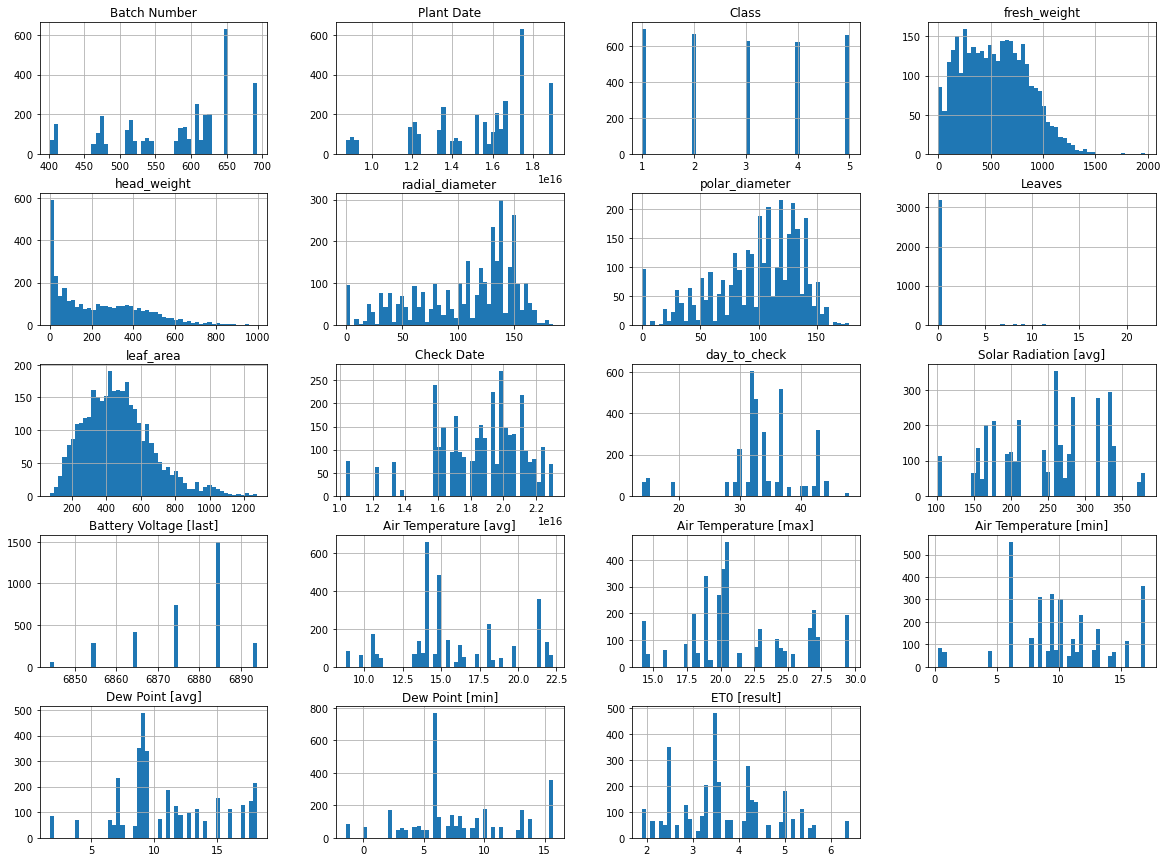

In [56]:
#check data
_ = data_all.hist(bins=50, figsize=(20,15))

In [66]:
data_all.describe()

,Batch Number,Plant Date,Class,fresh_weight,head_weight,radial_diameter,polar_diameter,Leaves,leaf_area,Check Date,day_to_check,Solar Radiation [avg],Battery Voltage [last],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Dew Point [avg],Dew Point [min],ET0 [result]
count,3291.000000,3.291000e+03,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3.291000e+03,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,580.346703,1.527245e+16,2.965664,542.683875,227.387116,106.996050,99.362200,0.312063,471.308417,1.862730e+16,33.773929,247.017016,6876.719538,15.742598,21.426873,10.061778,11.035886,7.891249,3.695229
std,81.217774,2.629745e+15,1.432060,309.422604,201.980497,44.470997,37.271069,1.924606,198.036412,2.645920e+15,6.373430,67.771476,11.710284,3.506394,3.955275,3.959798,3.947864,4.266008,1.018422
min,402.000000,8.726400e+15,1.000000,0.632000,0.000000,0.000000,0.000000,0.000000,74.000000,1.036800e+16,14.000000,102.000000,6844.000000,8.820000,14.180000,0.290000,1.700000,-1.400000,1.900000
25%,514.000000,1.347840e+16,2.000000,286.000000,39.500000,75.000000,80.000000,0.000000,328.000000,1.702080e+16,32.000000,193.000000,6874.000000,14.010000,18.960000,7.810000,8.900000,5.800000,2.900000
50%,607.000000,1.598400e+16,3.000000,529.000000,183.000000,120.000000,107.000000,0.000000,452.000000,1.926720e+16,33.000000,260.000000,6884.000000,14.790000,20.390000,9.870000,9.600000,7.000000,3.500000
75%,649.000000,1.736640e+16,4.000000,776.000000,375.000000,140.000000,130.000000,0.000000,580.500000,2.039040e+16,37.000000,286.000000,6884.000000,18.120000,24.450000,12.700000,13.500000,10.000000,4.300000
max,693.000000,1.900800e+16,5.000000,1978.000000,998.000000,185.000000,178.000000,22.000000,1276.000000,2.306880e+16,48.000000,382.000000,6894.000000,22.290000,29.570000,16.990000,18.200000,15.700000,6.400000


In [59]:
#train set
x = data_all.drop(['head_weight','radial_diameter','polar_diameter'], axis=1)

In [60]:
#test set
y = data_all[['head_weight','radial_diameter','polar_diameter']]

In [78]:
x

,Batch Number,Plant Date,Class,fresh_weight,Leaves,leaf_area,Check Date,day_to_check,Solar Radiation [avg],Battery Voltage [last],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Dew Point [avg],Dew Point [min],ET0 [result]
0,402,8.726400e+15,3,15.0,10.0,185.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
1,402,8.726400e+15,4,15.0,11.0,156.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
2,402,8.726400e+15,1,16.0,12.0,137.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
3,402,8.726400e+15,3,15.0,10.0,225.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
4,402,8.726400e+15,3,15.0,11.0,157.0,1.036800e+16,19.0,251,6884,14.75,24.45,4.42,6.5,4.3,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,690,1.883520e+16,1,513.0,0.0,450.0,2.306880e+16,34.0,210,6854,21.43,26.90,16.93,18.2,15.5,3.6
3734,690,1.883520e+16,1,514.0,0.0,500.0,2.306880e+16,34.0,210,6854,21.43,26.90,16.93,18.2,15.5,3.6
3735,690,1.883520e+16,2,500.0,0.0,530.0,2.306880e+16,34.0,210,6854,21.43,26.90,16.93,18.2,15.5,3.6
3736,690,1.883520e+16,4,480.0,0.0,490.0,2.306880e+16,34.0,210,6854,21.43,26.90,16.93,18.2,15.5,3.6


In [75]:
from sklearn.model_selection import train_test_split, cross_val_score

In [83]:
# Create separate training and test sets. we'll use the training set for steps 3--6
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)  

In [84]:
#check
print(" x_train:",len(x_train),'\n',"x_test:",len(x_test),'\n',"y_train:",len(y_train),'\n',"y_test:",len(y_test))

 x_train: 2632 
 x_test: 659 
 y_train: 2632 
 y_test: 659


In [57]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor